# Prepare a prediction model for profit of 50_startups data.Do transformations for getting better predictions of profit and make a table containing R^2 value for each prepared model.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.regressionplots import influence_plot
from scipy import stats
import statsmodels.formula.api as smf

In [5]:
startup = pd.read_csv("Documents\\50_Startups.csv")
startup

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [6]:
startup.State.value_counts()

New York      17
California    17
Florida       16
Name: State, dtype: int64

In [7]:
startup1= startup.rename(columns={"R&D Spend":"RDSpend","Marketing Spend":"MarketingSpend"},inplace=False)
startup1

,RDSpend,Administration,MarketingSpend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [8]:
startup1.corr()

,RDSpend,Administration,MarketingSpend,Profit
RDSpend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
MarketingSpend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


In [9]:
import seaborn as sns

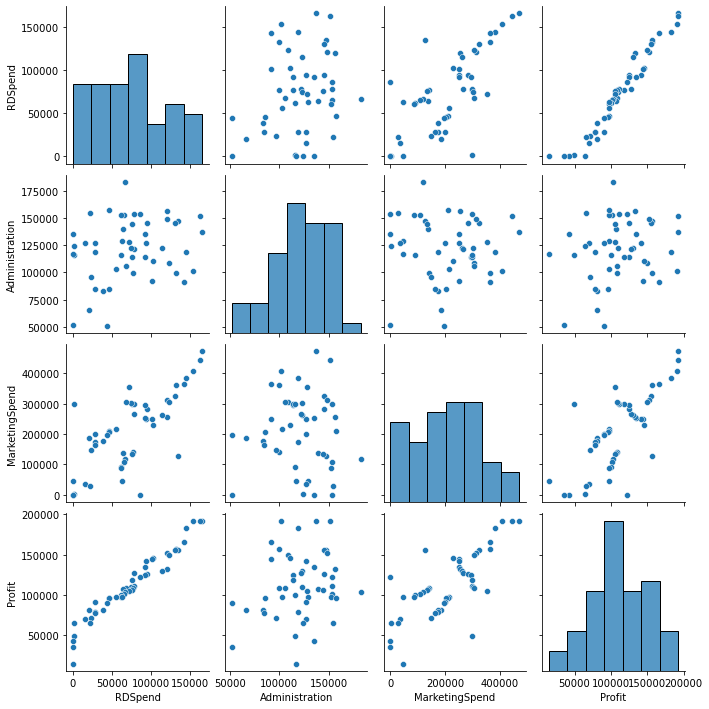

In [10]:
sns.pairplot(startup1)

In [11]:
#Build a model

In [12]:
startmodel = smf.ols('Profit~RDSpend+Administration+MarketingSpend',data=startup1).fit()


In [13]:
startmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Wed, 27 Apr 2022   Prob (F-statistic):           4.53e-30
Time:                        10:26:48   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
RDSpend            0.8057      0.045     17.846      0.000       0.715       0.897
Administration    -0.0268      0.051     -0.526      0.602      -0.130       0.076
MarketingSpend     0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [14]:
#P value for the administration coefficient is high so checking the Profit vs Administration relationship

In [15]:
admimodel = smf.ols('Profit~RDSpend',data= startup1).fit()

In [16]:
admimodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     849.8
Date:                Wed, 27 Apr 2022   Prob (F-statistic):           3.50e-32
Time:                        10:27:37   Log-Likelihood:                -527.44
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      48   BIC:                             1063.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.903e+04   2537.897     19.320      0.000    4.39e+04    5.41e+04
RDSpend        0.8543      0.029     29.151      0.000       0.795       0.913
==============================================================================
Omnibus:                       13.727   Durbin-Watson:                   1.116
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               18.536
Skew:                          -0.911   Prob(JB):                     9.44e-05
Kurtosis:                       5.361   Cond. No.                     1.65e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.65e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [17]:
# We found that p value is low for this meaning null hypothesis is false so aplha for this is not equal to zero

In [18]:
#Testing of the assumptions
#Test Assumption 1

In [19]:
rh_RD = smf.ols('RDSpend~Administration+MarketingSpend',data=startup1).fit().rsquared
vif_RD = 1/(1-rh_RD)

In [20]:
rh_Adm = smf.ols('Administration~RDSpend+MarketingSpend',data=startup1).fit().rsquared
vif_Adm = 1/(1-rh_Adm)

In [21]:
rh_mrk = smf.ols('MarketingSpend~RDSpend+Administration',data=startup1).fit().rsquared
vif_mrk = 1/(1-rh_mrk)

In [22]:
data1 = {'variables':["RDSpend","Administration","MarketingSpend"],'vif':[vif_RD,vif_Adm,vif_mrk]}
vif_frame = pd.DataFrame(data1)
vif_frame

,variables,vif
0,RDSpend,2.468903
1,Administration,1.175091
2,MarketingSpend,2.326773


In [23]:
# so vif is less than 20 first assumption is satisfied

In [24]:
#test assumption 3

C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


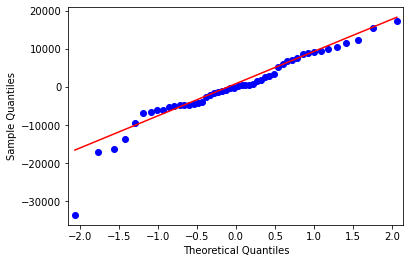

In [25]:
import statsmodels.api as sm
qqplot = sm.qqplot(startmodel.resid,line='q')
plt.show()

In [26]:
#test assumption 4 and assumption 2 in combination

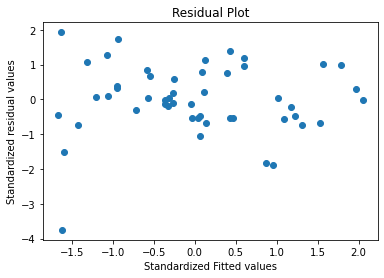

In [27]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()
plt.scatter(get_standardized_values(startmodel.fittedvalues),get_standardized_values(startmodel.resid))
plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

In [28]:
# this is random plot we are getting so we can say that assumption 4 and 2 is satisfied as variance not changing and also 
# there is no need to check error vs seperate features as in combination it is not giving us any relation

In [29]:
#Test Assumption no 5 as linear relation between y and features along with others

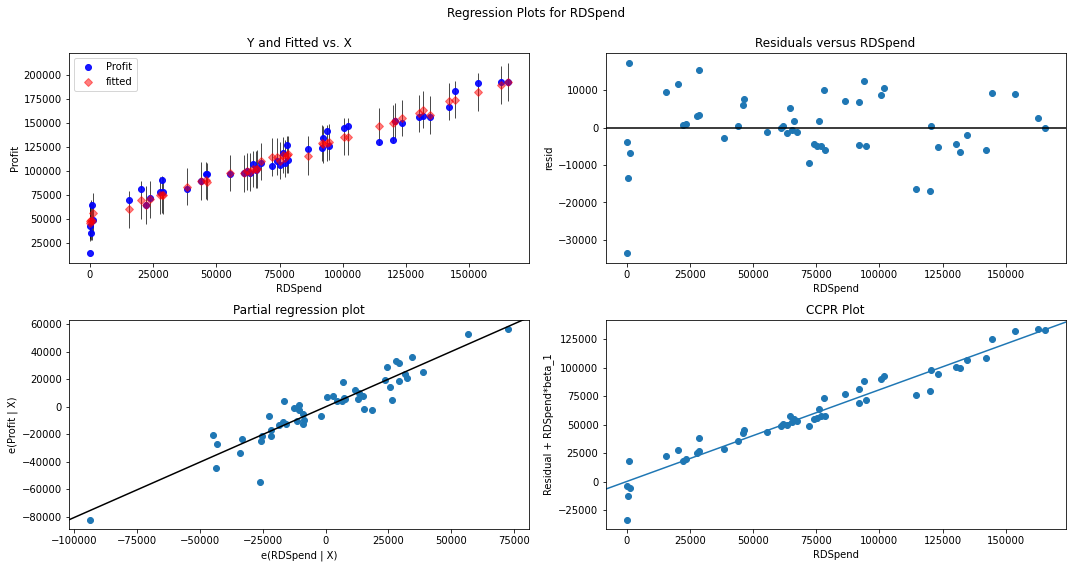

In [30]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(startmodel, "RDSpend", fig=fig)
plt.show()

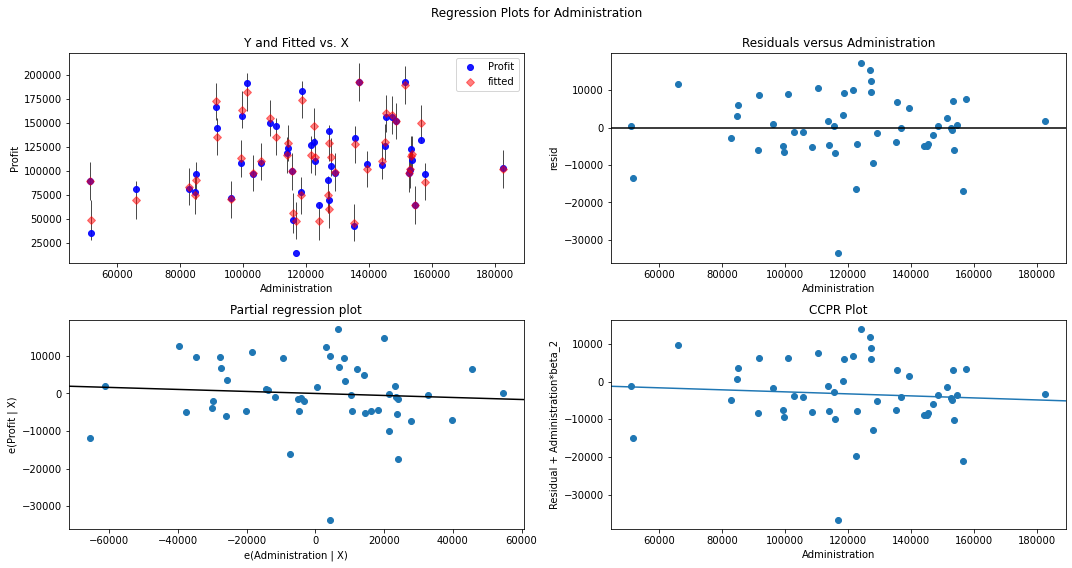

In [31]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(startmodel, "Administration", fig=fig)
plt.show()

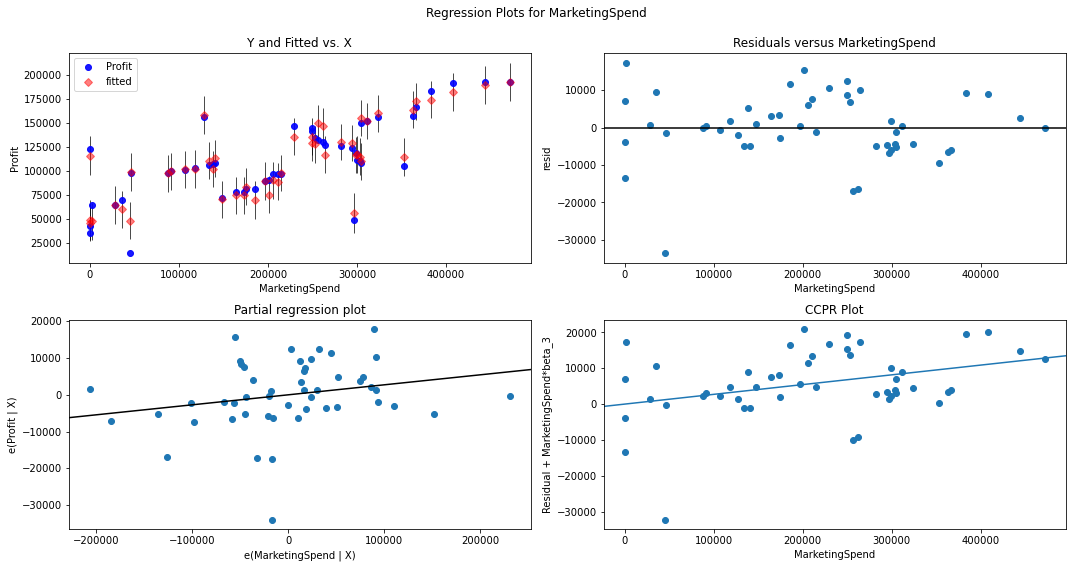

In [32]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(startmodel, "MarketingSpend", fig=fig)
plt.show()

In [33]:
#Detection of the outliers

In [34]:
startmodel_influence = startmodel.get_influence() #np.round(c,3)
(c,_) = startmodel_influence.cooks_distance

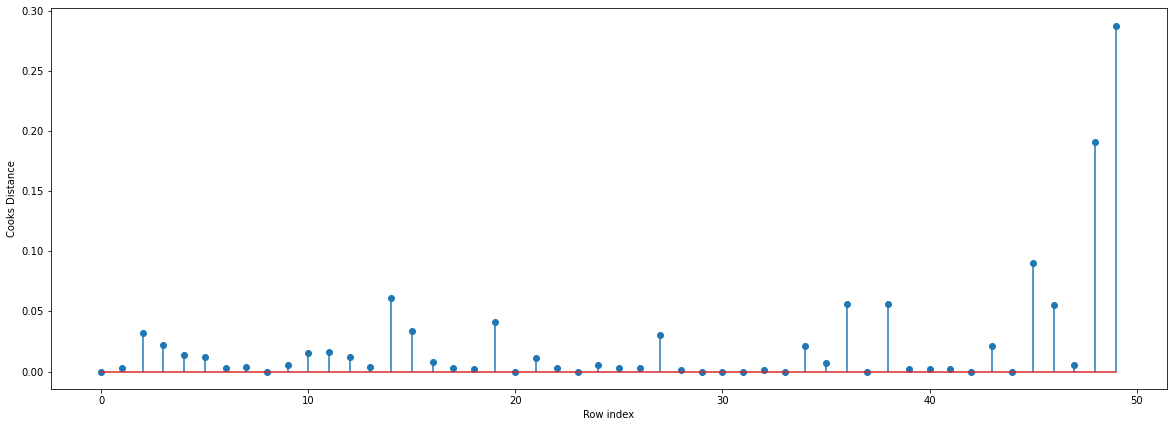

In [35]:
fig = plt.figure(figsize=(20, 7))
plt.stem(np.arange(len(startup1)), np.round(c,3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [36]:
(np.argmax(c),np.max(c))

(49, 0.28808229275432634)

In [37]:
k = startup1.shape[1]
n = startup1.shape[0]
leverage_cutoff = 3*((3 + 1)/n)
leverage_cutoff

0.24

In [38]:
# looking at graph point no 49(index49) is value greater than 0.24 so we need to delete this point

In [39]:
#improving the model

In [40]:
startup_new= startup1
startup_new1 = startup_new.drop(startup_new.index[[49]],axis=0)

In [41]:
startup_new1

,RDSpend,Administration,MarketingSpend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [42]:
#creating new model droping the administration column
startup_newmodel=smf.ols('Profit~RDSpend+MarketingSpend',data=startup_new1).fit()

In [43]:
startup_newmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     568.0
Date:                Wed, 27 Apr 2022   Prob (F-statistic):           3.74e-33
Time:                        10:35:59   Log-Likelihood:                -506.43
No. Observations:                  49   AIC:                             1019.
Df Residuals:                      46   BIC:                             1025.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       4.979e+04   2341.584     21.261      0.000    4.51e+04    5.45e+04
RDSpend            0.7754      0.035     22.136      0.000       0.705       0.846
MarketingSpend     0.0274      0.013      2.104      0.041       0.001       0.054
==============================================================================
Omnibus:                        0.082   Durbin-Watson:                   1.546
Prob(Omnibus):                  0.960   Jarque-Bera (JB):                0.273
Skew:                          -0.051   Prob(JB):                        0.872
Kurtosis:                       2.649   Cond. No.                     5.52e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.52e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


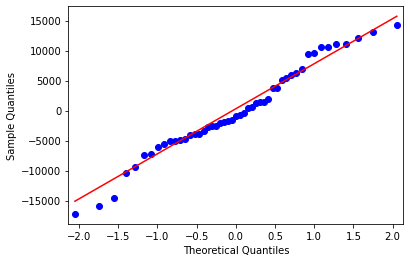

In [44]:
#test assumption 3
import statsmodels.api as sm
qqplot = sm.qqplot(startup_newmodel.resid,line='q')
plt.show()

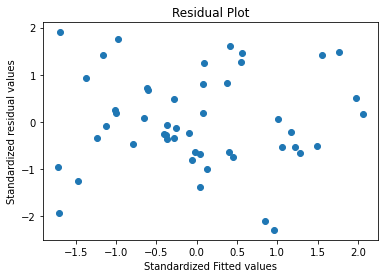

In [45]:
#test assumption 4 and 2
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()
plt.scatter(get_standardized_values(startup_newmodel.fittedvalues),get_standardized_values(startup_newmodel.resid))
plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

In [46]:
startupmodelnew_influence = startup_newmodel.get_influence() #np.round(c,3)
(c,_) = startupmodelnew_influence.cooks_distance

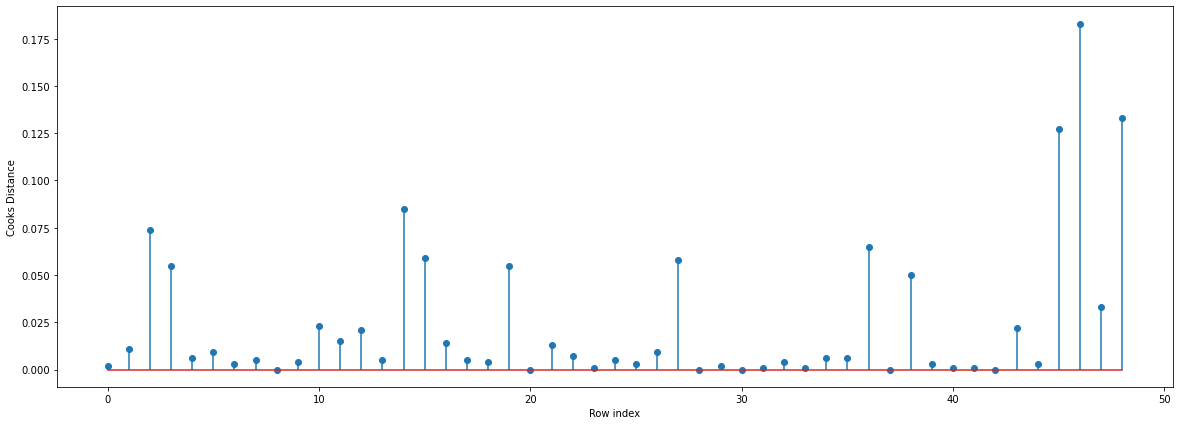

In [47]:
fig = plt.figure(figsize=(20, 7))
plt.stem(np.arange(len(startup_new1)), np.round(c,3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [48]:
k = startup_new1.shape[1]
n = startup_new1.shape[0]
leverage_cutoff = 3*((2 + 1)/n)
leverage_cutoff

0.18367346938775508

In [49]:
startup_new2 = startup_new1.drop(startup_new1.index[[46]],axis=0).reset_index()

In [50]:
startup_new2

,index,RDSpend,Administration,MarketingSpend,State,Profit
0,0,165349.20,136897.80,471784.10,New York,192261.83
1,1,162597.70,151377.59,443898.53,California,191792.06
2,2,153441.51,101145.55,407934.54,Florida,191050.39
3,3,144372.41,118671.85,383199.62,New York,182901.99
4,4,142107.34,91391.77,366168.42,Florida,166187.94
5,5,131876.90,99814.71,362861.36,New York,156991.12
6,6,134615.46,147198.87,127716.82,California,156122.51
7,7,130298.13,145530.06,323876.68,Florida,155752.60
8,8,120542.52,148718.95,311613.29,New York,152211.77
9,9,123334.88,108679.17,304981.62,California,149759.96


In [51]:
startup_newmodel2= smf.ols('Profit~RDSpend+MarketingSpend',data=startup_new2).fit()

In [52]:
startup_newmodel2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.960
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     544.5
Date:                Wed, 27 Apr 2022   Prob (F-statistic):           2.94e-32
Time:                        10:38:44   Log-Likelihood:                -495.55
No. Observations:                  48   AIC:                             997.1
Df Residuals:                      45   BIC:                             1003.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       5.017e+04   2333.087     21.505      0.000    4.55e+04    5.49e+04
RDSpend            0.7512      0.039     19.431      0.000       0.673       0.829
MarketingSpend     0.0353      0.014      2.511      0.016       0.007       0.064
==============================================================================
Omnibus:                        0.134   Durbin-Watson:                   1.578
Prob(Omnibus):                  0.935   Jarque-Bera (JB):                0.313
Skew:                          -0.091   Prob(JB):                        0.855
Kurtosis:                       2.649   Cond. No.                     5.49e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.49e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

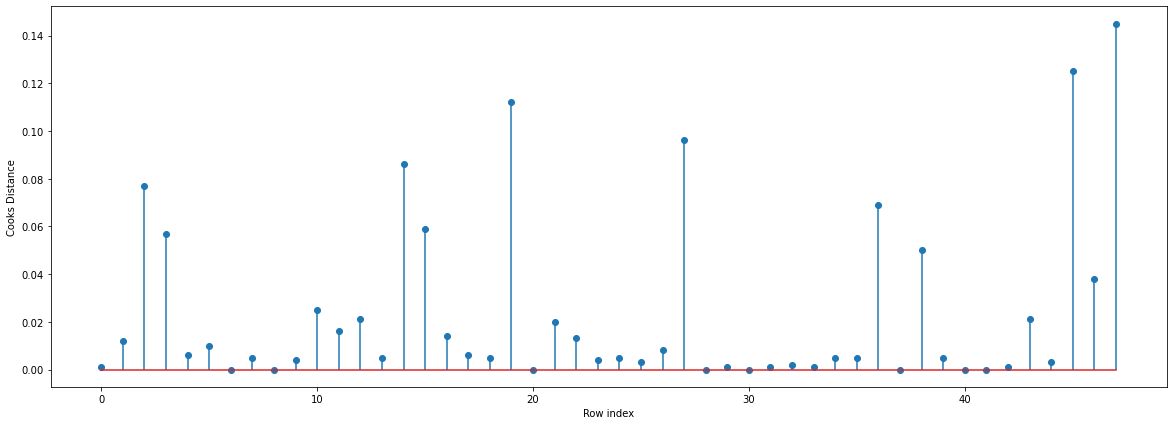

In [53]:
startupmodelnew2_influence = startup_newmodel2.get_influence() #np.round(c,3)
(c,_) = startupmodelnew2_influence.cooks_distance
fig = plt.figure(figsize=(20, 7))
plt.stem(np.arange(len(startup_new2)), np.round(c,3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [54]:
k = startup_new2.shape[1]
n = startup_new2.shape[0]
leverage_cutoff = 3*((2 + 1)/n)
leverage_cutoff

0.1875

In [55]:
#new data for prediction
new_data = pd.DataFrame({"RDSpend":165349.20,"MarketingSpend":471784.10},index=[1])
new_data

,RDSpend,MarketingSpend
1,165349.2,471784.1


In [56]:
startup_newmodel2.predict(new_data)

1    191028.251047
dtype: float64